#### # 학습 시 참고한 URL : https://datascienceschool.net

### # 확률론적 생성모형


- QDA, LDA, 나이브 베이즈 모형은 확률론적 생성모형이다.


- 확률론적 생성모형은 y를 구하기 위해 베이즈 정리를 이용하는 작업을 하여 다음과 같은 계산을 수행한다. $\ \ P(y = k \mid x) = \dfrac{P(x \mid y = k)\; P(y = k)}{P(x)} $


- 이렇게 하면 x와 y의 함수를 구할 수 있다는 것이다. 그중에서 y는 classification을 위한 0,1,2,3,4 등의 이산값이다.


- 이렇게 생성모형을 이용하면 x가 주어졌을때 y가 0일 확률, x가 주어졌을때 y가 1일 확률 .. 등의 함수를 다 구할 수 있다. 0일확률, 1일 확률, 2일 확률 등의 분포를 다 구한다는 말이다.


- 따라서 classification할때 이런 확률분포를 다 구해서 가장 확률이 가장 큰 y를 선택하는 것이다.


- 참고로 위의 식에서 분모 P(x)는 사실 계산을 하지는 않는다. x는 이미 주어지고, y값을 0을 했을때 1로 했을때, 2로했을때 값이 달라지는 것이다. 그래서 y값을 보고 그중에서 제일 큰것을 고른것이다. 따라서 P(x)는 주어졌고 다른 y값에도 마찬가지로 이미 고정되어 있는 값인 것이다. 그러니 y값을 비교할때 굳이 고려할 필요는 없는 것이다.


- 크기 비교만 할때는 밑에 있는 정규화상수를 무시해도 상관없다.


- 따라서 통상 다음과 같이 분자만 계산하는게 일반적이다. 
$\ \ P(y = k \mid x) \;\; \propto \;\; P(x \mid y = k) \; P(y = k) $


- 그러면 위의 식과 같이 추정을 해야하는데 어떻게 해야하는가.


- 위의 식에서 P(y=k)는 y가 들어갔을때 y에 대한 함수를 말하는 것이고 , P(x/y=k)는 x와 y 두개를 가지는 다변수함수를 말하는 것이다.


- 사전확률 P(y=k)는 특별한 경우가 아닌 이상 카테고리컬 분포라고 가정하고 다음과 같이 계산하면 된다. P(y=k) = (y=k인 데이터의 수) / (모든 데이터의 수)


- 그다음 P(x/y=k) 즉 y 에 대한 x의 조건부 확률인 가능도(likelihood)는 y가 뭐일때라고 하는 조건이 주어진 것이다. 이 조건은 우리가 가지고 있는 데이터에서 실제로 y가 k 인것만 골라내서 P(x)를 추정하면 된다. 예를들어 y가 실제로 0인 얘들만 골라낸 다음에 그 데이터로 P(x)가 어떻게 생겼는지를 확률분포를 추정한다는 것이다.


- 확률분포 추정은 확률모형(예를들어 확률밀도함수)을 따른다고 가정하고 그 확률모형이 어떤 확률분포인지 가정한다. 그 다음에 모수를 추정한다. x가 어떤거냐에 따라서 확률분포가 베르누이분포가 될 수도 있고, 다항분포가 될 수도 있고, 가우시안 노멀이 될수도 있다.

### # QDA(quadratic discriminant analysis) 


- 독립변수 x가 연속된 실수이며 -무한대에서 +무한대의 모든값을 가질 수 있는 확률분포가 ‘가우시안 노멀’ 임을 가정한다.


- 다음과 같은 확률밀도 함수를 나타낸다.

$\ \ p(x \mid y = k) = \dfrac{1}{(2\pi)^{D/2} |\Sigma_k|^{1/2}} \exp \left( -\dfrac{1}{2} (x-\mu_k)^T \Sigma_k^{-1} (x-\mu_k) \right) $


- 이렇게 다변수 가우시안 정규분포라고 가정하고 모수를 추정한다. 가우시안 노멀에는 두종류의 모수가 있었는데 하나는 기댓값 벡터(중심위치가 여기다! 라고 설명하는)와 하나는 공분산행렬(분포의 모양이 완전 원인가, 타원인가 를 설명하는)이 있다.


- 추정방법은 기댓값 벡터는 x끼리 평균을 내면 되고, 공분산행렬은 공분산 구해서 평균내면 된다.


- 여기서 k는 y=k인 경우만 데이터를 모아서 추정한 것이기 때문에 k가 달라짐에 따라 데이터들도 달라지고 마찬가지로 분포도 달라지게 될 것이다.


- 따라서 우리가 가지고 있는 클래스 갯수 만큼 뮤가 있고 클래스 갯수만큼 시그마가 존재하게 된다.


- 예를 들어 1,2,3을 classification하는(k가 1,2,3) 것을 추정한다고 가정하면 우리는 그래서 뮤1, 시그마1, 뮤2, 시그마2, 뮤3, 시그마3을 알게 된 것이다.


$\ \ \mu_1 = \begin{bmatrix}  0 \\ 0 \end{bmatrix}, \;\;
\mu_2 = \begin{bmatrix}  1 \\ 1 \end{bmatrix}, \;\;
\mu_3 = \begin{bmatrix}-1  \\ 1 \end{bmatrix} $

$\ % <![CDATA[
\ \Sigma_1 = \begin{bmatrix} 0.7 &   0 \\ 0   & 0.7 \end{bmatrix}, \;\;
\Sigma_2 = \begin{bmatrix} 0.8 & 0.2 \\ 0.2 & 0.8 \end{bmatrix}, \;\;
\Sigma_3 = \begin{bmatrix} 0.8 & 0.2 \\ 0.2 & 0.8 \end{bmatrix} %]]> $


- y의 사전확률은 P(Y=1) = P(Y=2) = P(Y=3) = 1/3과 같이 동일하다고 하자.


- 이렇게 되면 사실상 P(y=k∣x) 를 알게되는 것이다.


- 단점 : 클래스별로 공분산행렬을 전부 추정해내야 한다. 데이터가 적으면 상관 없는데 x가 1000개만 되도 공분산행렬은 1000 x 1000 메트릭스가 되게된다. 이 과정을 클래스 개수만큼 또 해줘야 한다. 따라서 클래스가 많아지고 독립변수의 개수가 많아지면 추정치들이 점점 부정확해진다

### # QDA 관련 연습 문제

- QDA를 사용하여 붓꽃 분류 문제를 풀고 성능을 confusion matrix와 classification report를 구하여 비교한 후 ROC 커브를 그려라.

In [1]:
%matplotlib inline
%config InlineBackend.figure_formats = {'png', 'retina'}
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from patsy import *
import statsmodels.api as sm
import scipy as sp
import seaborn as sns

from sklearn.datasets import load_iris
import pandas as pd
iris = load_iris()

df = pd.DataFrame(iris.data, columns=iris.feature_names)
sy = pd.Series(iris.target, dtype="category")
sy = sy.cat.rename_categories(iris.target_names)
df['species'] = sy
df.tail()

sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
145                6.7               3.0                5.2               2.3   
146                6.3               2.5                5.0               1.9   
147                6.5               3.0                5.2               2.0   
148                6.2               3.4                5.4               2.3   
149                5.9               3.0                5.1               1.8   

       species  
145  virginica  
146  virginica  
147  virginica  
148  virginica  
149  virginica

In [2]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

qda = QuadraticDiscriminantAnalysis(store_covariance=True).fit(iris.data, iris.target)

result  = qda.predict(iris.data)
result

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [3]:
from sklearn.metrics import confusion_matrix

y_true = iris.target
y_pred = result
confusion_matrix(y_true, y_pred)

array([[50,  0,  0],
       [ 0, 48,  2],
       [ 0,  1, 49]], dtype=int64)

In [4]:
from sklearn.metrics import classification_report
print(classification_report(y_true, y_pred,
                            target_names=['setosa', 'versicolor','virginica']))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        50
  versicolor       0.98      0.96      0.97        50
   virginica       0.96      0.98      0.97        50

   micro avg       0.98      0.98      0.98       150
   macro avg       0.98      0.98      0.98       150
weighted avg       0.98      0.98      0.98       150



auc[0] :  1.0
auc[1] :  0.9988
auc[2] :  0.9962


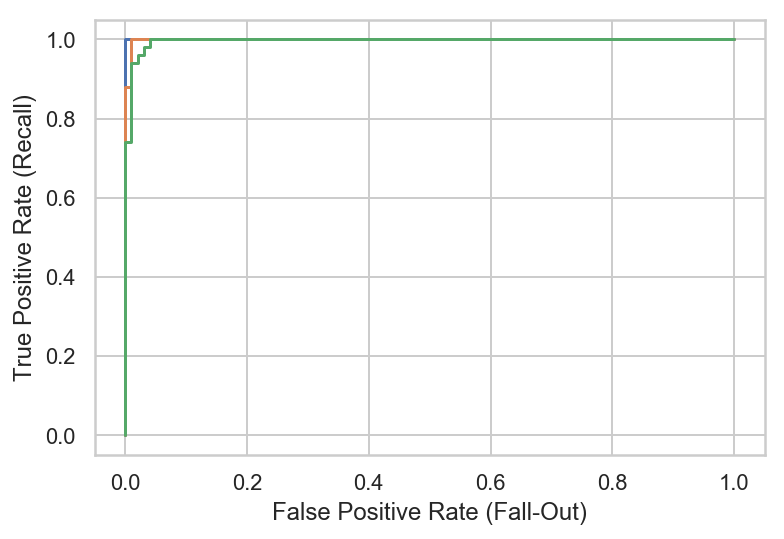

In [5]:
from sklearn.metrics import roc_curve
from sklearn.naive_bayes import GaussianNB
from sklearn.datasets import load_iris
from sklearn.preprocessing import label_binarize
from sklearn.metrics import auc

iris = load_iris()
X = iris.data
y = label_binarize(iris.target, [0, 1, 2])

fpr = [None] * 3
tpr = [None] * 3
thr = [None] * 3

for i in range(3):
    result = qda.fit(iris.data, y[:, i])
    fpr[i], tpr[i], thr[i] = roc_curve(y[:, i], result.predict_proba(X)[:, 1])
    plt.plot(fpr[i], tpr[i])
    print("auc[{}] : ".format(i), auc(fpr[i], tpr[i]))

plt.xlabel('False Positive Rate (Fall-Out)')
plt.ylabel('True Positive Rate (Recall)')
plt.show()

### # LDA(Linear Discriminant Analysis)


- QDA와 유사하나 QDA의 약점을 보완하고자 나온 방법이다.


- 현실에서는 연속적인 x값이 나오는 경우를 봤을때 다수의 경우에서 공분산행렬은 클래스에 따라 크게 달라지지 않는다는 것을 알아내었다.


- 따라서 과감하게 각 클래스에 대한 x의 조건부 확률분포가 공통된 공분산 행렬을 갖는다고 가정한다. 즉 데이터의 중심위치는 다르지만 데이터 분포의 모양은 같다고 가정한다.


- 클래스가 많아지고 독립변수의 개수가 많아지면 추정치들이 점점 부정확해지는 현상을 줄여보자는 가정이다.

### # LDA 관련 연습 문제

- LDA를 사용하여 붓꽃 분류 문제를 풀고 성능을 confusion matrix와 classification report를 구하여 비교한 후 ROC 커브를 그려라.

In [6]:
from sklearn.datasets import load_iris
import pandas as pd
iris = load_iris()

df = pd.DataFrame(iris.data, columns=iris.feature_names)
sy = pd.Series(iris.target, dtype="category")
sy = sy.cat.rename_categories(iris.target_names)
df['species'] = sy
df.tail()

sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
145                6.7               3.0                5.2               2.3   
146                6.3               2.5                5.0               1.9   
147                6.5               3.0                5.2               2.0   
148                6.2               3.4                5.4               2.3   
149                5.9               3.0                5.1               1.8   

       species  
145  virginica  
146  virginica  
147  virginica  
148  virginica  
149  virginica

In [7]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

lda = LinearDiscriminantAnalysis(n_components=3, solver="svd", store_covariance=True).fit(iris.data, iris.target)

result  = lda.predict(iris.data)
result

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [8]:
from sklearn.metrics import confusion_matrix

y_true = iris.target
y_pred = result
confusion_matrix(y_true, y_pred)

array([[50,  0,  0],
       [ 0, 48,  2],
       [ 0,  1, 49]], dtype=int64)

In [9]:
from sklearn.metrics import classification_report
print(classification_report(y_true, y_pred,
                            target_names=['setosa', 'versicolor','virginica']))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        50
  versicolor       0.98      0.96      0.97        50
   virginica       0.96      0.98      0.97        50

   micro avg       0.98      0.98      0.98       150
   macro avg       0.98      0.98      0.98       150
weighted avg       0.98      0.98      0.98       150



auc[0] :  1.0
auc[1] :  0.8294
auc[2] :  0.9783999999999999


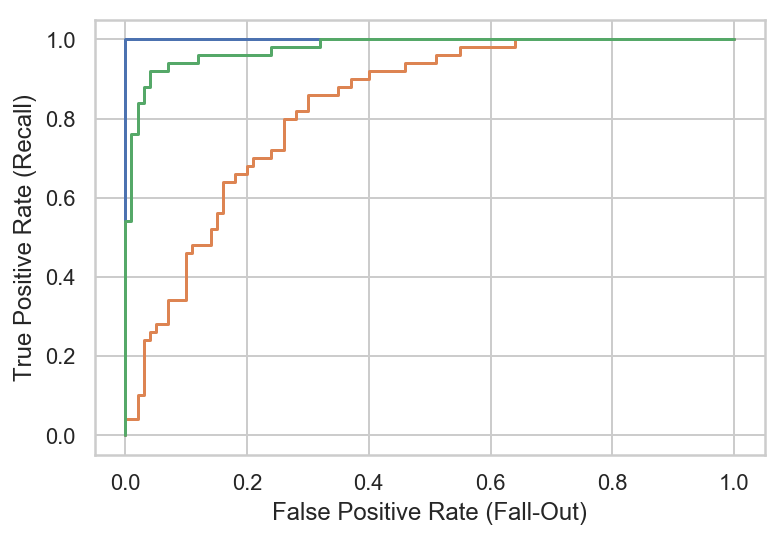

In [10]:
from sklearn.metrics import roc_curve
from sklearn.naive_bayes import GaussianNB
from sklearn.datasets import load_iris
from sklearn.preprocessing import label_binarize
from sklearn.metrics import auc

iris = load_iris()
X = iris.data
y = label_binarize(iris.target, [0, 1, 2])

fpr = [None] * 3
tpr = [None] * 3
thr = [None] * 3

for i in range(3):
    result = lda.fit(iris.data, y[:, i])
    fpr[i], tpr[i], thr[i] = roc_curve(y[:, i], result.predict_proba(X)[:, 1])
    plt.plot(fpr[i], tpr[i])
    print("auc[{}] : ".format(i), auc(fpr[i], tpr[i]))

plt.xlabel('False Positive Rate (Fall-Out)')
plt.ylabel('True Positive Rate (Recall)')
plt.show()